In [589]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import matplotlib.cm as cm
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')
sns.set_style(style="whitegrid")
%matplotlib inline

warnings.filterwarnings('ignore')

# plt.style.use('fivethirtyeight')

In [641]:
# import MPV excel
mpv_xlsx = pd.ExcelFile('data/MPVDatasetDownload.xlsx')
mpv_df1 = pd.read_excel(mpv_xlsx, '2013-2020 Police Killings')
mpv_df2 = pd.read_excel(mpv_xlsx, '2013-2019 Killings by PD')

In [642]:
mpv_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 46 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          102 non-null    object 
 1   City                                                           103 non-null    object 
 2   PD                                                             102 non-null    object 
 3   Black People Killed by Police (1/1/2013-12/31/2019)            93 non-null     float64
 4   Hispanic People Killed by Police (1/1/2013-12/31/2019)         71 non-null     float64
 5   Native American People Killed by Police (1/1/2013-12/31/2019)  12 non-null     float64
 6   Asian People Killed by Police (1/1/2013-12/31/2019)            32 non-null     float64
 7   Pacific Islanders Killed by Police (1/1/2013-12/31/2019)      

In [405]:
# see a peek of MPV_df1 dataframe
mpv_df1.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601.0,...,Drug or alcohol use,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201.0,...,No,Allegedly Armed,gun,attack,Car,No,5958.0,NaN,NaN,NaN
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763.0,...,No,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001.0,...,No,Unclear,undetermined,undetermined,Car,No,5953.0,NaN,NaN,NaN


In [106]:
mpv_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 27 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype         
---  ------                                                                                                                                                                      --------------  -----         
 0   Victim's name                                                                                                                                                               8263 non-null   object        
 1   Victim's age                                                                                                                                                                8151 non-null   object        
 2   Victim's gender                                         

In [406]:
# import Lincoln Institute excel

# li_xlsx = pd.ExcelFile('data/fisc_full_dataset_2017_update.xlsx')
li_xlsx = "data/fisc_full_dataset_2017_update.xlsx"
li_df = pd.read_excel(li_xlsx,sheet_name='Dataset', usecols="A:N, BV:BW, GV:GW, LV:LX")
# li_df = pd.read_excel(li_xlsx, index_col=None, na_values=['NA'], usecols = "A:N, BV:BW, GV:GW, LV:LX")
# li_df = pd.read_excel(li_xlsx, 'Dataset')

In [407]:
# see a peek of Lincoln Institute dataset
li_df.head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,taxes_city,tax_property_city,tax_sales_grossrec_city,public_safety_city,police_city,public_safety_cnty,police_cnty,public_safety_schl,police_schl,fire_schl
0,1977,AK: Anchorage,22002001.0,174500,4.044885,5342.24,4956.92,2148.77,279.32,1869.46,...,1515.87,1472.52,10.89,495.14,211.08,NaN,NaN,NaN,NaN,NaN
1,1978,AK: Anchorage,22002001.0,177000,3.759509,5948.99,5490.05,2468.11,403.24,2064.86,...,1613.17,1566.84,6.46,473.27,200.38,NaN,NaN,NaN,NaN,NaN
2,1979,AK: Anchorage,22002001.0,179600,3.376308,6158.68,5746.64,2573.34,496.97,2076.37,...,1567.01,1447.32,6.94,469.54,227.21,NaN,NaN,NaN,NaN,NaN
3,1980,AK: Anchorage,22002001.0,178800,2.974757,5654.93,5210.77,2313.62,371.46,1942.16,...,1322.12,1236.77,6.54,551.01,285.26,NaN,NaN,NaN,NaN,NaN
4,1981,AK: Anchorage,22002001.0,174431,2.696590,6192.83,5736.81,2771.43,338.76,2432.67,...,1222.39,1143.39,6.54,525.90,281.27,NaN,NaN,NaN,NaN,NaN


In [408]:
li_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6232 entries, 0 to 6231
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     6232 non-null   int64  
 1   city_name                6232 non-null   object 
 2   id_city                  6191 non-null   float64
 3   city_population          6232 non-null   int64  
 4   cpi                      6150 non-null   float64
 5   rev_total_city           6232 non-null   float64
 6   rev_general_city         6232 non-null   float64
 7   intergovt_rev_city       6232 non-null   float64
 8   igr_federal_city         6232 non-null   float64
 9   igr_state_city           6232 non-null   float64
 10  own_source_rev_city      6232 non-null   float64
 11  taxes_city               6232 non-null   float64
 12  tax_property_city        6232 non-null   float64
 13  tax_sales_grossrec_city  6232 non-null   float64
 14  public_safety_city      

In [409]:
li_df = li_df.sort_values(by=['year'])
li_df.head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,taxes_city,tax_property_city,tax_sales_grossrec_city,public_safety_city,police_city,public_safety_cnty,police_cnty,public_safety_schl,police_schl,fire_schl
0,1977,AK: Anchorage,22002001.0,174500,4.044885,5342.24,4956.92,2148.77,279.32,1869.46,...,1515.87,1472.52,10.89,495.14,211.08,NaN,NaN,NaN,NaN,NaN
4387,1977,OH: Toledo,362048007.0,367224,4.044885,1424.85,1336.70,518.31,392.65,125.66,...,481.00,70.20,3.08,369.61,192.04,56.34,19.35,0.0,0.0,0.0
4346,1977,OH: Dayton,362057004.0,209534,4.044885,1843.63,1705.70,504.52,360.78,143.74,...,869.42,188.78,0.04,440.33,240.40,56.81,38.17,0.0,0.0,0.0
4305,1977,OH: Columbus,362025003.0,564241,4.044885,1333.58,1136.87,342.81,226.88,115.93,...,490.76,60.94,5.99,365.00,214.10,41.03,21.82,0.0,0.0,0.0
4264,1977,OH: Cleveland,362018014.0,638045,4.044885,2136.16,1796.70,761.79,589.37,172.42,...,610.03,250.54,6.59,571.96,382.33,26.44,8.03,0.0,0.0,0.0


In [410]:
# hide/delete data before 2013
li_df = li_df[li_df.year>=2013]
li_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 528 to 6231
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     760 non-null    int64  
 1   city_name                760 non-null    object 
 2   id_city                  755 non-null    float64
 3   city_population          760 non-null    int64  
 4   cpi                      750 non-null    float64
 5   rev_total_city           760 non-null    float64
 6   rev_general_city         760 non-null    float64
 7   intergovt_rev_city       760 non-null    float64
 8   igr_federal_city         760 non-null    float64
 9   igr_state_city           760 non-null    float64
 10  own_source_rev_city      760 non-null    float64
 11  taxes_city               760 non-null    float64
 12  tax_property_city        760 non-null    float64
 13  tax_sales_grossrec_city  760 non-null    float64
 14  public_safety_city     

In [411]:
li_df['city_name'].apply(lambda x: x.split(': '))

528        [CA, Bakersfield]
4013           [NY, Buffalo]
2783         [MD, Frederick]
5776    [VA, Virginia Beach]
1389        [DC, Washington]
                ...         
3976              [NV, Reno]
3935         [NV, Las Vegas]
3894        [NM, Las Cruces]
3812            [NH, Nashua]
6231          [WY, Cheyenne]
Name: city_name, Length: 760, dtype: object

In [412]:
# this was a check to troubleshoot the split not working
# for x in li_df['city_name']:
#     print(x)

li_df = li_df[li_df.city_name.str.contains(': ')]
li_df.head()
# df[~df.C.str.contains("XYZ")]

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,taxes_city,tax_property_city,tax_sales_grossrec_city,public_safety_city,police_city,public_safety_cnty,police_cnty,public_safety_schl,police_schl,fire_schl
528,2013,CA: Bakersfield,52015001.0,357858,1.052211,1203.24,1122.10,252.97,80.43,172.54,...,470.51,241.48,209.88,581.01,213.90,474.19,125.96,0.0,0.0,0.0
4013,2013,NY: Buffalo,332015005.0,260176,1.052211,5868.28,5690.15,4341.78,280.62,4061.16,...,586.58,514.31,50.14,567.71,325.59,172.85,36.95,NaN,NaN,NaN
2783,2013,MD: Frederick,212011004.0,66404,1.052211,1662.55,1453.31,88.15,30.66,57.49,...,826.24,776.50,21.71,464.93,429.45,401.47,115.92,NaN,NaN,NaN
5776,2013,VA: Virginia Beach,472132001.0,445038,1.052211,4223.83,4086.35,1594.36,335.20,1259.16,...,1947.60,1302.60,488.43,445.74,216.26,NaN,NaN,NaN,NaN,NaN
1389,2013,DC: Washington,92001001.0,634725,1.052211,19943.03,18489.08,5319.41,5319.41,0.00,...,10246.31,3265.29,2504.98,1848.24,927.95,NaN,NaN,NaN,NaN,NaN


In [413]:
# split City column into state abbreviation and city name

li_df['City'] = li_df['city_name'].apply(lambda x: x.split(': ')[1])
li_df['State_abbrev'] = li_df['city_name'].apply(lambda x: x.split(': ')[0])
# cities_df['Lat'] = cities_df['coords'].apply(lambda x: x.split('POINT(')[1].split(' ')[1].split(')')[0])

In [414]:
li_df['City']

528        Bakersfield
4013           Buffalo
2783         Frederick
5776    Virginia Beach
1389        Washington
             ...      
3976              Reno
3935         Las Vegas
3894        Las Cruces
3812            Nashua
6231          Cheyenne
Name: City, Length: 750, dtype: object

In [415]:
li_df['State_abbrev']

528     CA
4013    NY
2783    MD
5776    VA
1389    DC
        ..
3976    NV
3935    NV
3894    NM
3812    NH
6231    WY
Name: State_abbrev, Length: 750, dtype: object

In [416]:
li_df.head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,tax_sales_grossrec_city,public_safety_city,police_city,public_safety_cnty,police_cnty,public_safety_schl,police_schl,fire_schl,City,State_abbrev
528,2013,CA: Bakersfield,52015001.0,357858,1.052211,1203.24,1122.10,252.97,80.43,172.54,...,209.88,581.01,213.90,474.19,125.96,0.0,0.0,0.0,Bakersfield,CA
4013,2013,NY: Buffalo,332015005.0,260176,1.052211,5868.28,5690.15,4341.78,280.62,4061.16,...,50.14,567.71,325.59,172.85,36.95,NaN,NaN,NaN,Buffalo,NY
2783,2013,MD: Frederick,212011004.0,66404,1.052211,1662.55,1453.31,88.15,30.66,57.49,...,21.71,464.93,429.45,401.47,115.92,NaN,NaN,NaN,Frederick,MD
5776,2013,VA: Virginia Beach,472132001.0,445038,1.052211,4223.83,4086.35,1594.36,335.20,1259.16,...,488.43,445.74,216.26,NaN,NaN,NaN,NaN,NaN,Virginia Beach,VA
1389,2013,DC: Washington,92001001.0,634725,1.052211,19943.03,18489.08,5319.41,5319.41,0.00,...,2504.98,1848.24,927.95,NaN,NaN,NaN,NaN,NaN,Washington,DC


In [417]:
li_df_avg = li_df.groupby('City')['police_city','City'].mean()

In [418]:
li_df_avg.head()

,police_city
City,
Akron,270.844
Albuquerque,298.026
Anaheim,381.334
Anchorage,466.254
Arlington,242.078


In [419]:
# insert column BIPOC (Y/N)
# mpv_df1 = mpv_df1.insert(4, 'BIPOC', 0)
# mpv_df1.head()

#create function defining values for BIPOC column
def label_BIPOC(row):
    '''
    0 = white
    1 = BIPOC
    2 = unknown
    '''
    if row["Victim's race"] == 'White':
        return 0
    elif row["Victim's race"] == 'Unknown race':
        return 2
    else:
        return 1

# label_BIPOC(mpv_df1.iloc[0])

mpv_df1['BIPOC'] = mpv_df1.apply(label_BIPOC, axis=1)
mpv_df1.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID,BIPOC
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601.0,...,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN,2
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201.0,...,Allegedly Armed,gun,attack,Car,No,5958.0,NaN,NaN,NaN,0
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763.0,...,Allegedly Armed,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706.0,...,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001.0,...,Unclear,undetermined,undetermined,Car,No,5953.0,NaN,NaN,NaN,0


In [420]:
# calculate killing rate for BIPOC unarmed

# mpv_df1.rename({"Unarmed/Did Not Have an Actual Weapon": 'Weapon_Status'})

# mpv_df1.head()

# unarmed_df = mpv_df1.groupby('Unarmed/Did Not Have an Actual Weapon')

# unarmed_df.head()

# count total unarmed people
unarmed_killed = mpv_df1[mpv_df1['Unarmed/Did Not Have an Actual Weapon'] == 'Unarmed/Did Not Have an Actual Weapon']['Unarmed/Did Not Have an Actual Weapon'].count()
# mpv_df1.count(['Unarmed/Did Not Have an Actual Weapon'] = 'Unarmed/Did Not Have an Actual Weapon')

# count unarmed with BIPOC == 1

In [421]:
unarmed_BIPOC_killed = mpv_df1[(mpv_df1['Unarmed/Did Not Have an Actual Weapon'] 
                 == 'Unarmed/Did Not Have an Actual Weapon') & (mpv_df1['BIPOC'] == 1)]['BIPOC'].count()

In [422]:
BIPOC_sample_freq = unarmed_BIPOC_killed/unarmed_killed

In [423]:
unarmed_nonBIPOC_killed = unarmed_killed-unarmed_BIPOC_killed
unarmed_nonBIPOC_killed/unarmed_killed

0.4730803177405119

In [424]:
unarmed_white_killed = mpv_df1[(mpv_df1['Unarmed/Did Not Have an Actual Weapon'] 
                 == 'Unarmed/Did Not Have an Actual Weapon') & (mpv_df1['BIPOC'] == 0)]['BIPOC'].count()

white_sample_freq = unarmed_white_killed/unarmed_killed

In [399]:
# NULL HYPOTHESIS: The ratios of unarmed killed who are BIPOC and unarmed killed who are white are the same. // There is no difference in the percentage of unarmed BIPOC vs. white folx killed.
# Alt wording for null hyp: The ratios of unarmed killed BIPOC to total unarmed killed and white unarmed to total unarmed are the same
# Alternate hypothesis: More unarmed killed are BIPOC than white.

diff_in_sample_proportions = BIPOC_sample_freq - white_sample_freq
p_value = 1 - diff_in_sample_proportions.cdf
stats.b

AttributeError: 'numpy.float64' object has no attribute 'cdf'

In [453]:
# add a column that is numerically coded for armed status

def label_armed(row):
    '''
    0 = unarmed
    1 = unclear
    2 = armed
    3 = vehicle
    '''
    if row["Unarmed/Did Not Have an Actual Weapon"] == 'Allegedly Armed':
        return 2
    elif row["Unarmed/Did Not Have an Actual Weapon"] == 'Unarmed/Did Not Have an Actual Weapon':
        return 0
    elif row["Unarmed/Did Not Have an Actual Weapon"] == 'Vehicle':
        return 3
    else:
        return 1
    
mpv_df1['Armed_Status'] = mpv_df1.apply(label_armed, axis=1)
mpv_df1.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID,BIPOC,Armed_Status
0,Kevin Lee Catlett,62,Male,Unknown race,NaN,2020-06-30,900 McArthur Street,Johnson City,TN,37601.0,...,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN,2,2
1,Wade Russell Meisberger,48,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,West Beech St and South Church St,Hazleton,PA,18201.0,...,gun,attack,Car,No,5958.0,NaN,NaN,NaN,0,2
2,Nick Costales,34,Male,Hispanic,https://fatalencounters.org/wp-content/uploads...,2020-06-29,9501 Monte Vista Ave,Montclair,CA,91763.0,...,gun,attack,NaN,NaN,NaN,NaN,NaN,NaN,1,2
3,Brittany S. Teichroeb,26,Female,White,NaN,2020-06-29,TX-191 and TX-250 Loop,Midland,TX,79706.0,...,gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
4,John Parks,57,Male,White,https://fatalencounters.org/wp-content/uploads...,2020-06-29,Court Avenue and Audubon Drive,Paducah,KY,42001.0,...,undetermined,undetermined,Car,No,5953.0,NaN,NaN,NaN,0,1


In [492]:
# Null hypothesis: BIPOC are equally likely to be labeled unclearly armed as white folx.
#Alt hypothesis: BIPOC are more likely to be labeled 'unclearly armed' than white folx.

#query df where I pull out armed status and race + each armed status marker ! = armed (pull out rows)

# mpv_df1[mpv_df1[['Armed_Status'] != 0]

mpv_df1_hyp = mpv_df1[['BIPOC','Armed_Status']][mpv_df1['Armed_Status'] < 2]


# mpv_df1_hyp.describe()

# mpv_df1_hyp.info()

mpv_df1_hyp.groupby('BIPOC').count()

# calculate total mean and std
# do a t-test
# stats

,Armed_Status
BIPOC,
0,735
1,936
2,156


In [495]:
mpv_df1_hyp['Armed_Status'].count()

1827

In [623]:
pd.crosstab(mpv_df1_hyp['BIPOC'], mpv_df1_hyp['Armed_Status'])

Armed_Status,0,1
BIPOC,,
0,474,261
1,597,339
2,62,94


In [625]:
pd.crosstab(mpv_df1['BIPOC'], mpv_df1['Unarmed/Did Not Have an Actual Weapon'])

Unarmed/Did Not Have an Actual Weapon,Allegedly Armed,Unarmed/Did Not Have an Actual Weapon,Unclear,Vehicle
BIPOC,,,,
0,2654,474,261,225
1,2630,597,339,282
2,601,62,94,44


In [493]:
mpv_df1_hyp.groupby('Armed_Status').count()
# mpv_df1_hyp.head()

,BIPOC
Armed_Status,
0,1133
1,694


In [468]:
len(mpv_df1_hyp['Armed_Status'])

2378

In [516]:
white_pop = mpv_df1_hyp['Armed_Status'][mpv_df1_hyp['BIPOC'] == 0]
BIPOC_pop = mpv_df1_hyp['Armed_Status'][mpv_df1_hyp['BIPOC'] == 1]


In [517]:
mpv_df1_hyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 4 to 8262
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BIPOC         1827 non-null   int64
 1   Armed_Status  1827 non-null   int64
dtypes: int64(2)
memory usage: 42.8 KB


In [498]:
# drop unneeded columns for a cleaner dataframe

# mpv_df1_hyp = mpv_df1_hyp.drop(columns = [[0:3], [4:10]])

# calculate population mean of Armed_Status column based on only unarmed=0, unclear = 1, vehicle = 3
mpv_df1_hyp['Armed_Status'].mean()

0.3798576902025178

In [507]:
mpv_df1_hyp[mpv_df1_hyp['BIPOC'] == 1].mean()['Armed_Status']

0.36217948717948717

In [508]:
mpv_df1_hyp[mpv_df1_hyp['BIPOC'] == 0].mean()['Armed_Status']

0.3551020408163265

In [510]:
mpv_df1_hyp[mpv_df1_hyp['BIPOC'] == 1].std()['Armed_Status']

0.4808872746896641

In [536]:
mpv_df1_hyp[mpv_df1_hyp['BIPOC'] == 0].std()['Armed_Status']

0.47887010427353416

In [542]:
stats.ttest_ind(white_pop, BIPOC_pop, equal_var=True)

Ttest_indResult(statistic=-0.29917660764887394, pvalue=0.764842545375272)

In [534]:
p_value = poss_unarmed_pop.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for difference in labeling 'unclear' armed status based on race: {:2.2f}".format(p_value))

p-value for difference in labeling 'unclear' armed status based on race: 0.76


TypeError: 'Series' objects are mutable, thus they cannot be hashed

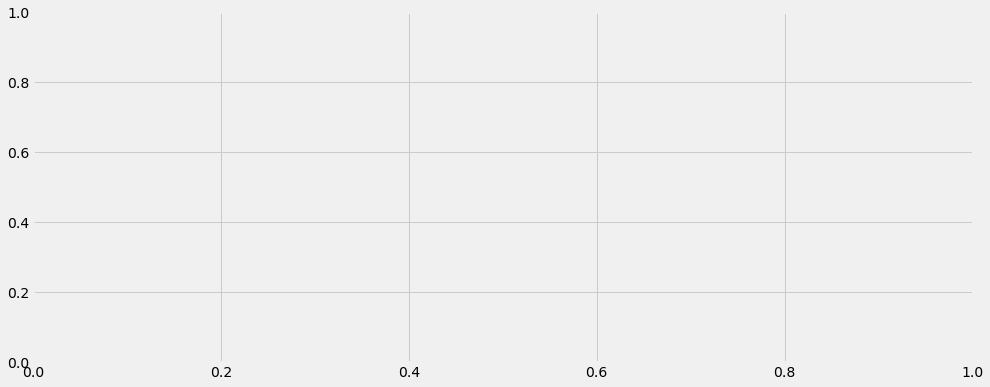

In [371]:
# do a histogram of BIPOC

#### NEED HELP HERE

BIPOC_labels = {0: 'White', 1: 'BIPOC', 2: 'Unknown'}
fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.bar(x = BIPOC_labels[mpv_df1['BIPOC']], height=mpv_df1['BIPOC'])
plt.show()

In [236]:
mpv_df2.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,10.0,1.0,...,6040.333333,11.065881,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.375820
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.666667,3.546806,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.502131
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.333333,10.894620,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.249641
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,1.0,NaN,4.0,1.0,...,1921.800000,5.258895,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.824724
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.000000,11.799916,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900.0,6.276151


In [242]:
# compare killings by PD to budget by city
# hide/delete non-police spending
# merge with mpv_df2 based on city
mpv_li_df = mpv_df2.merge(li_df_avg,how='left', left_on='City', right_on='City')
mpv_li_df.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests,police_city
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,10.0,1.0,...,11.065881,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.375820,298.026
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,3.546806,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.502131,381.334
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,10.894620,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.249641,466.254
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,1.0,NaN,4.0,1.0,...,5.258895,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.824724,242.078
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,11.799916,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900.0,6.276151,384.932


In [639]:
mpv_li_df.iloc[10:20]

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests,police_city,diss_index_buckets
11,Massachusetts,Boston,Boston Police Department,9.0,1.0,NaN,1.0,NaN,NaN,1.0,...,12716.0,13647.0,11423.0,10247.0,9994.0,8843.0,10830.8,11.079514,549.078,(50-70]
12,New York,Buffalo,Buffalo Police Department,1.0,2.0,NaN,NaN,NaN,NaN,NaN,...,14774.0,12893.0,12354.0,10937.0,10050.0,10720.0,11390.8,2.633704,338.352,(50-70]
14,North Carolina,Charlotte,Charlotte-Mecklenburg Police Department,12.0,2.0,NaN,NaN,1.0,5.0,1.0,...,19087.0,23669.0,25305.0,23740.0,23632.0,22021.0,23673.4,8.870716,323.766,(50-70]
15,Virginia,Chesapeake,Chesapeake Police Department,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9177.0,8084.0,5919.0,3500.0,4080.0,5149.0,5346.4,3.740835,219.822,(30-50]
16,Illinois,Chicago,Chicago Police Department,56.0,13.0,NaN,NaN,NaN,2.0,5.0,...,112862.0,100346.0,84215.0,61507.0,57523.0,78737.0,76465.6,9.939110,522.968,(70-100]
18,Ohio,Cincinnati,Cincinnati Polce Department,8.0,1.0,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,6971.0,6694.0,6832.5,17.563117,475.916,(50-70]
19,Ohio,Cleveland,Cleveland Police Department,8.0,NaN,NaN,NaN,NaN,1.0,1.0,...,9245.0,8519.0,6441.0,3883.0,4417.0,3834.0,5418.8,18.454270,501.654,(50-70]
20,Colorado,Colorado Springs,Colorado Springs Police Department,2.0,2.0,NaN,NaN,NaN,10.0,1.0,...,17106.0,20316.0,22020.0,20489.0,21462.0,16670.0,20191.4,7.428905,212.528,(30-50]
21,Ohio,Columbus,Columbus Division of Police,27.0,NaN,NaN,NaN,NaN,11.0,2.0,...,12745.0,8663.0,9942.0,10092.0,9412.0,10954.0,9812.6,40.763916,317.057,(50-70]
22,Texas,Corpus Christi,Corpus Christi Police Department,1.0,5.0,NaN,NaN,NaN,1.0,NaN,...,16900.0,17443.0,19278.0,19747.0,16655.0,16238.0,17872.2,3.916697,262.554,(30-50]


In [640]:
mpv_li_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 98
Data columns (total 48 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          78 non-null     object 
 1   City                                                           78 non-null     object 
 2   PD                                                             78 non-null     object 
 3   Black People Killed by Police (1/1/2013-12/31/2019)            76 non-null     float64
 4   Hispanic People Killed by Police (1/1/2013-12/31/2019)         53 non-null     float64
 5   Native American People Killed by Police (1/1/2013-12/31/2019)  9 non-null      float64
 6   Asian People Killed by Police (1/1/2013-12/31/2019)            26 non-null     float64
 7   Pacific Islanders Killed by Police (1/1/2013-12/31/2019)       5

In [244]:
mpv_li_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          102 non-null    object 
 1   City                                                           103 non-null    object 
 2   PD                                                             102 non-null    object 
 3   Black People Killed by Police (1/1/2013-12/31/2019)            93 non-null     float64
 4   Hispanic People Killed by Police (1/1/2013-12/31/2019)         71 non-null     float64
 5   Native American People Killed by Police (1/1/2013-12/31/2019)  12 non-null     float64
 6   Asian People Killed by Police (1/1/2013-12/31/2019)            32 non-null     float64
 7   Pacific Islanders Killed by Police (1/1/2013-12/31/2019)      

In [245]:
mpv_li_df = mpv_li_df.dropna(subset=['Killings by Police per 10k Arrests', 'police_city'])

In [246]:
mpv_li_df.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests,police_city
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,10.0,1.0,...,11.065881,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.375820,298.026
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,3.546806,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.502131,381.334
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,10.894620,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.249641,466.254
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,1.0,NaN,4.0,1.0,...,5.258895,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.824724,242.078
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,11.799916,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900.0,6.276151,384.932


In [247]:
mpv_li_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 98
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          78 non-null     object 
 1   City                                                           78 non-null     object 
 2   PD                                                             78 non-null     object 
 3   Black People Killed by Police (1/1/2013-12/31/2019)            76 non-null     float64
 4   Hispanic People Killed by Police (1/1/2013-12/31/2019)         53 non-null     float64
 5   Native American People Killed by Police (1/1/2013-12/31/2019)  9 non-null      float64
 6   Asian People Killed by Police (1/1/2013-12/31/2019)            26 non-null     float64
 7   Pacific Islanders Killed by Police (1/1/2013-12/31/2019)       5

In [238]:
# compute avg city spending for all years

# avg_police_spending_df = mpv_li_df.groupby('City').mean()
# avg_police_spending_df = mpv_li_df.groupby('City')[['police_city','Killings by Police per 10k Arrests']].mean()

# avg_police_spending_df.head()
# avg_police_spending_df.info()

,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),All People Killed by Police (1/1/2013-12/31/2019),Total,Black,...,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests,police_city
City,,,,,,,,,,,,,,,,,,,,,
Albuquerque,3.0,18.0,NaN,NaN,NaN,10.0,1.0,32.0,545852.0,14878.0,...,11.065881,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.375820,298.026
Anaheim,3.0,7.0,NaN,NaN,NaN,3.0,NaN,13.0,336265.0,8209.0,...,3.546806,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.502131,381.334
Anchorage,1.0,1.0,2.0,NaN,NaN,5.0,4.0,13.0,291826.0,15308.0,...,10.894620,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.249641,466.254
Arlington,7.0,1.0,NaN,1.0,NaN,4.0,1.0,14.0,365438.0,67087.0,...,5.258895,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.824724,242.078
Atlanta,13.0,NaN,NaN,NaN,NaN,1.0,1.0,15.0,420003.0,224316.0,...,11.799916,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900.0,6.276151,384.932


In [255]:
# investigate outlier points

# print(df[df.Points == df.Points.max()]) 

mpv_li_df[mpv_li_df['police_city'] == mpv_li_df['police_city'].max()]

# mpv_[avg_police_spending_df['Killings by Police per 10k Arrests'] == avg_police_spending_df['Killings by Police per 10k Arrests'].max()]

# avg_police_spending_df['police_city'].max(axis=0)
# 3-4 standard deviations away = outliers
# do a historgram of Black-White Dissimilarity Index and figure out bins

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests,police_city
24,District of Columbia,Washington,DC Metropolitan Police Department,16.0,NaN,NaN,NaN,NaN,1.0,2.0,...,12.376127,41630.0,41186.0,36219.0,44175.0,53028.0,47147.0,44351.0,4.284007,924.594


In [249]:
mpv_li_df[mpv_li_df['Killings by Police per 10k Arrests'] == mpv_li_df['Killings by Police per 10k Arrests'].max()]

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests,police_city
21,Ohio,Columbus,Columbus Division of Police,27.0,NaN,NaN,NaN,NaN,11.0,2.0,...,4.99979,12745.0,8663.0,9942.0,10092.0,9412.0,10954.0,9812.6,40.763916,317.057


In [288]:
mpv_li_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 98
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   State                                                          78 non-null     object 
 1   City                                                           78 non-null     object 
 2   PD                                                             78 non-null     object 
 3   Black People Killed by Police (1/1/2013-12/31/2019)            76 non-null     float64
 4   Hispanic People Killed by Police (1/1/2013-12/31/2019)         53 non-null     float64
 5   Native American People Killed by Police (1/1/2013-12/31/2019)  9 non-null      float64
 6   Asian People Killed by Police (1/1/2013-12/31/2019)            26 non-null     float64
 7   Pacific Islanders Killed by Police (1/1/2013-12/31/2019)       5

In [608]:
mpv_li_df.describe()


,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),All People Killed by Police (1/1/2013-12/31/2019),Total,Black,...,Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests,police_city
count,76.000000,53.000000,9.000000,26.000000,5.0,70.000000,47.000000,78.000000,7.800000e+01,7.800000e+01,...,78.000000,73.000000,74.000000,72.000000,75.000000,76.000000,77.000000,78.000000,78.000000,78.000000
mean,8.776316,7.867925,1.777778,1.538462,1.0,6.571429,2.808511,22.269231,7.026624e+05,1.466618e+05,...,8.093659,31666.712329,29853.256757,26828.138889,25099.653333,23911.381579,22939.506494,25309.992308,10.659930,346.253821
std,10.577459,11.395069,0.971825,0.859338,0.0,6.627941,2.533586,22.029893,1.036714e+06,2.514618e+05,...,3.922749,48420.258476,46478.147451,40917.940622,37135.320600,34114.154475,30338.289878,36913.490316,6.514282,141.581289
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,2.000000,2.089160e+05,3.177000e+03,...,1.472242,2913.000000,3040.000000,2566.000000,2422.000000,2405.000000,2741.000000,2634.800000,2.111635,16.658000
25%,2.000000,1.000000,1.000000,1.000000,1.0,2.000000,1.000000,10.000000,2.928202e+05,3.249975e+04,...,5.276137,12196.000000,12455.000000,11279.750000,10922.000000,9520.750000,9566.000000,10900.600000,6.283182,257.854000
50%,5.000000,5.000000,2.000000,1.000000,1.0,4.500000,2.000000,15.000000,4.042075e+05,6.509850e+04,...,7.133026,18013.000000,19185.000000,16810.500000,16874.000000,15225.000000,15182.000000,15846.600000,9.185460,313.380000
75%,10.500000,10.000000,2.000000,2.000000,1.0,10.000000,4.000000,25.750000,6.404070e+05,1.518100e+05,...,10.279488,31892.000000,32490.750000,27841.000000,27668.500000,25938.000000,24359.000000,27004.550000,13.675631,390.663500
max,56.000000,71.000000,4.000000,4.000000,1.0,40.000000,13.000000,124.000000,8.175133e+06,1.861295e+06,...,18.900628,393809.000000,387727.000000,339470.000000,314864.000000,286225.000000,246773.000000,315011.800000,40.763916,924.594000


In [609]:
mpv_li_df['Black-White Dissimilarity Index (2010)'].head()

0    28.484186
1    27.784100
2    34.325073
3    39.739590
4    74.119720
Name: Black-White Dissimilarity Index (2010), dtype: float64

In [355]:
# std of police_city is 141.581289; drop outlying values
# actually don't drop any values

std_police_city = mpv_li_df.loc[:,"police_city"].std()
std_police_city

outlier_dist = std_police_city*3

mean_police_city = mpv_li_df.loc[:,"police_city"].mean()
max_police_city = mpv_li_df['police_city'].max()
upper_bound = mean_police_city+outlier_dist
lower_bound = mean_police_city-outlier_dist

In [291]:
mpv_li_df.drop([mpv_li_df['police_city'] >= upper_bound])

KeyError: '[(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False)] not found in axis'

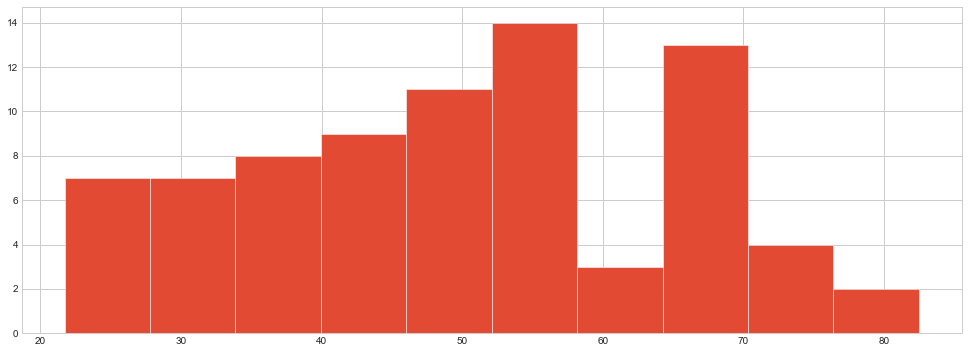

In [382]:
# do a histogram of Black-White Dissimilarity Index and figure out bins

fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.hist(mpv_li_df['Black-White Dissimilarity Index (2010)'])
plt.show()

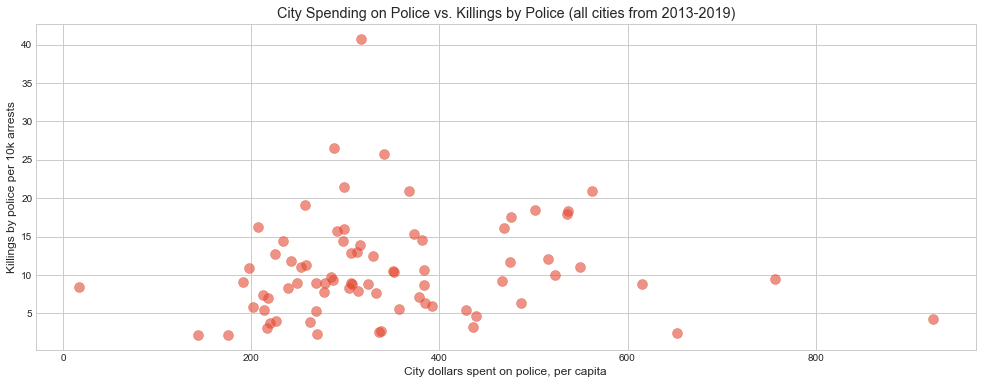

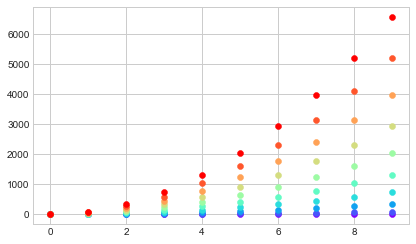

In [593]:
# create a scatterplot of Police City Spending per capita vs. Killings by Police per 10k Arrests,
# all cities from 2013-2019

fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.scatter(mpv_li_df['police_city'], mpv_li_df['Killings by Police per 10k Arrests'], s = 100, alpha = .6)
ax.set_xlabel('City dollars spent on police, per capita')
ax.set_ylabel('Killings by police per 10k arrests')
ax.set_title("City Spending on Police vs. Killings by Police (all cities from 2013-2019)") 
plt.show()

x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(10)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for y, c in zip(ys, colors):
    plt.scatter(x, y, color=c)
# IDEA 1: color dots based on Black-White Dissimilarity Index

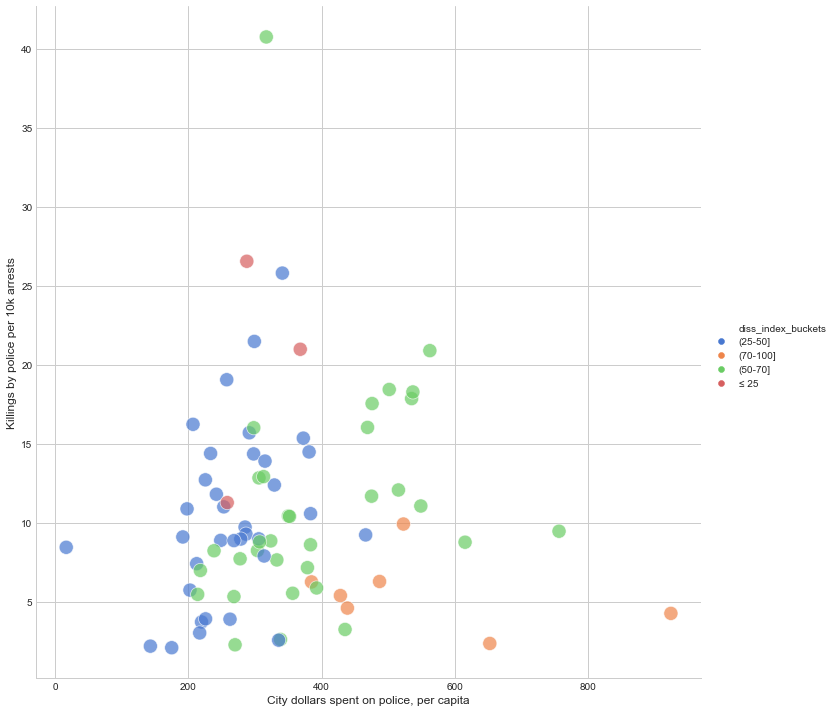

In [618]:
diss_index_buckets = []
for index in mpv_li_df['Black-White Dissimilarity Index (2010)']:
    if index <= 25:
        diss_index_buckets.append('≤ 25')
    elif index <= 50:
        diss_index_buckets.append('(25-50]')
    elif index <= 70:
        diss_index_buckets.append('(50-70]')
    else:
        diss_index_buckets.append('(70-100]')

mpv_li_df['diss_index_buckets'] = diss_index_buckets

splot = sns.relplot(x='police_city', y='Killings by Police per 10k Arrests', hue='diss_index_buckets',
            sizes=(100, 400), alpha=.7, palette="muted",
            height=10, data=mpv_li_df, ax=ax, s=200)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
splot.set(xlabel="City dollars spent on police, per capita", ylabel="Killings by police per 10k arrests")



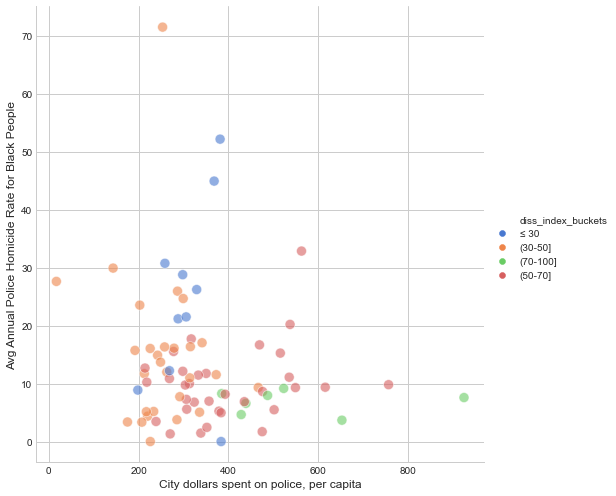

In [637]:
diss_index_buckets = []
for index in mpv_li_df['Black-White Dissimilarity Index (2010)']:
    if index <= 30:
        diss_index_buckets.append('≤ 30')
    elif index <= 50:
        diss_index_buckets.append('(30-50]')
    elif index <= 70:
        diss_index_buckets.append('(50-70]')
    else:
        diss_index_buckets.append('(70-100]')

mpv_li_df['diss_index_buckets'] = diss_index_buckets

splot = sns.relplot(x='police_city', y='Avg Annual Police Homicide Rate for Black People', hue='diss_index_buckets',
            sizes=(1000, 400), alpha=.6, palette="muted",
            height=7, data=mpv_li_df, ax=ax, s=100, label='big')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
splot.set(xlabel="City dollars spent on police, per capita", ylabel="Avg Annual Police Homicide Rate for Black People")



In [621]:
mpv_li_df_len = len(mpv_li_df.columns)

metrics = [mpv_li_df[i] for i in range(mpv_li_df_len)]

# print(type(metrics)

# fig, ax = plt.subplots(4,1, figsize=(25,35))

# ax = ax.flatten()

# col_names = list(mpv_li_df.columns)

# for idx, metric in enumerate(metrics):
#     ax[idx].scatter(mpv_li_df['police_city'], metric[0])
#     ax[idx].set_xlabel('City dollars spent on police, per capita')
#     ax[idx].set_ylabel('{}'.format(metric[1]))
#     ax[idx].set_title("City Spending on Police vs. {} (all cities from 2013-2019)".format(metric[1]))

# plt.show()
# # fig.tight_layout()



KeyError: 0

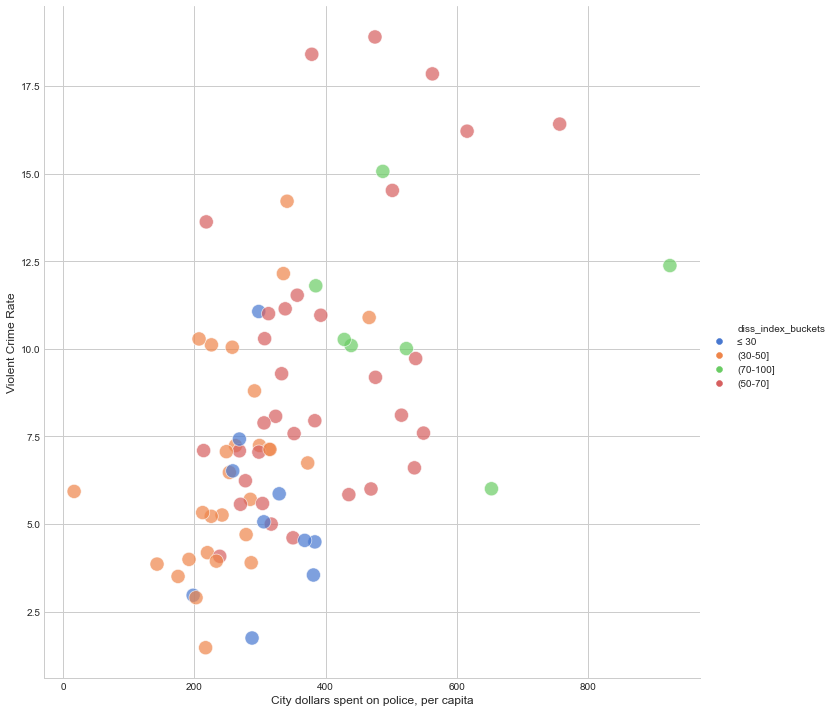

In [638]:
diss_index_buckets = []
for index in mpv_li_df['Black-White Dissimilarity Index (2010)']:
    if index <= 30:
        diss_index_buckets.append('≤ 30')
    elif index <= 50:
        diss_index_buckets.append('(30-50]')
    elif index <= 70:
        diss_index_buckets.append('(50-70]')
    else:
        diss_index_buckets.append('(70-100]')

mpv_li_df['diss_index_buckets'] = diss_index_buckets

splot = sns.relplot(x='police_city', y='Violent Crime Rate', hue='diss_index_buckets',
            sizes=(100, 400), alpha=.7, palette="muted",
            height=10, data=mpv_li_df, ax=ax, s=200)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
splot.set(xlabel="City dollars spent on police, per capita", ylabel="Violent Crime Rate")



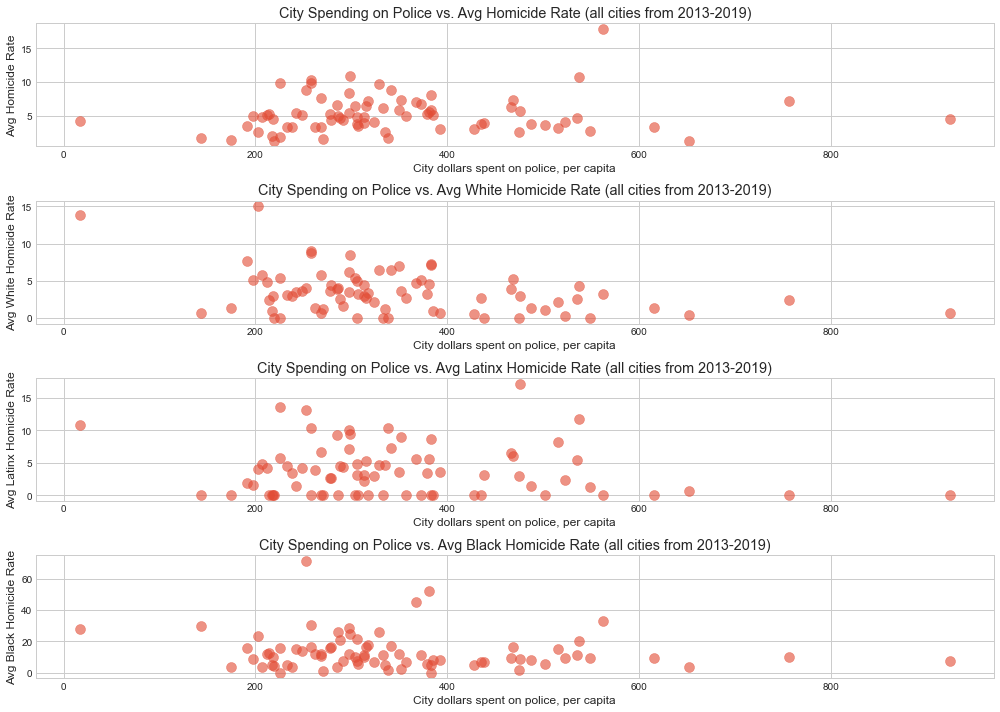

In [601]:
metrics = [[mpv_li_df['Avg Annual Police Homicide Rate'], 'Avg Homicide Rate'],
           [mpv_li_df['Avg Annual Police Homicide Rate for White People'], 'Avg White Homicide Rate'],
           [mpv_li_df['Avg Annual Police Homicide Rate for Hispanic People'], 'Avg Latinx Homicide Rate'],
           [mpv_li_df['Avg Annual Police Homicide Rate for Black People'], 'Avg Black Homicide Rate']]

fig, ax = plt.subplots(4,1, figsize=(14,10))

ax = ax.flatten()

# col_names = list(mpv_li_df.columns)

for idx, metric in enumerate(metrics):
    ax[idx].scatter(mpv_li_df['police_city'], metric[0], s= 100, alpha=.6)
    ax[idx].set_xlabel('City dollars spent on police, per capita')
    ax[idx].set_ylabel('{}'.format(metric[1]))
    ax[idx].set_title("City Spending on Police vs. {} (all cities from 2013-2019)".format(metric[1]))

fig.tight_layout()



NameError: name 'ax1' is not defined

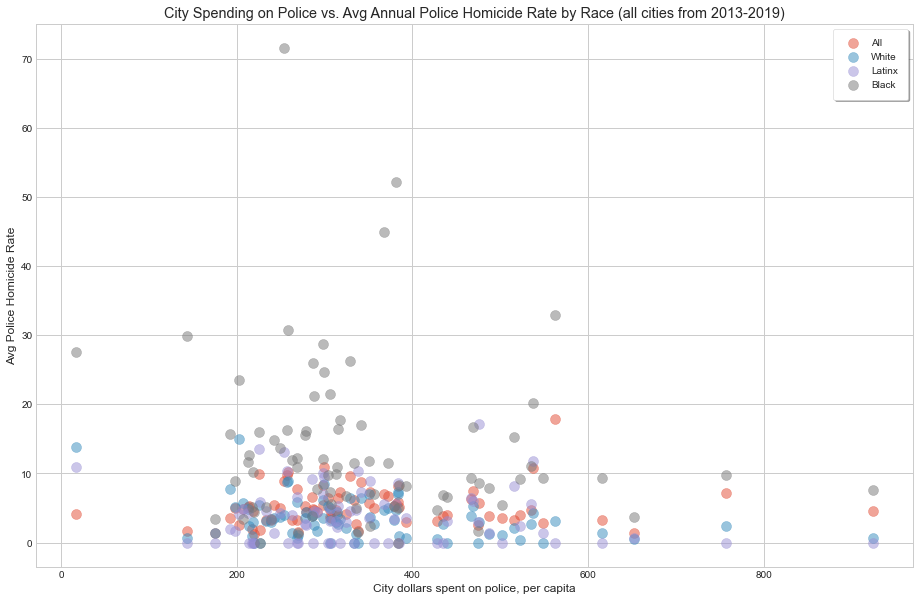

In [583]:
metrics = [[mpv_li_df['Avg Annual Police Homicide Rate'], 'Avg Annual Police Homicide Rate'],
           [mpv_li_df['Avg Annual Police Homicide Rate for White People'], 'Avg Annual Police Homicide Rate for White People'],
           [mpv_li_df['Avg Annual Police Homicide Rate for Hispanic People'], 'Avg Annual Police Homicide Rate for Hispanic People'],
           [mpv_li_df['Avg Annual Police Homicide Rate for Black People'], 'Avg Annual Police Homicide Rate for Black People']]

labels = ['All', 'White', 'Latinx', 'Black']

fig, ax = plt.subplots(1,1, figsize=(14,10))

# ax = ax.flatten()

# col_names = list(mpv_li_df.columns)

for idx, metric in enumerate(metrics):
    ax.scatter(mpv_li_df['police_city'], metric[0], label=labels[idx], s=100, alpha=.5)

ax.set_xlabel('City dollars spent on police, per capita')
ax.set_ylabel('Avg Police Homicide Rate')

ax.set_title("City Spending on Police vs. Avg Annual Police Homicide Rate by Race (all cities from 2013-2019)".format(metric[1]))

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()
# fig.tight_layout()

# ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
# ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')



Text(0.5, 1.0, 'Avg Annual Police Homicide Rates by Race (all cities from 2013-2019)')

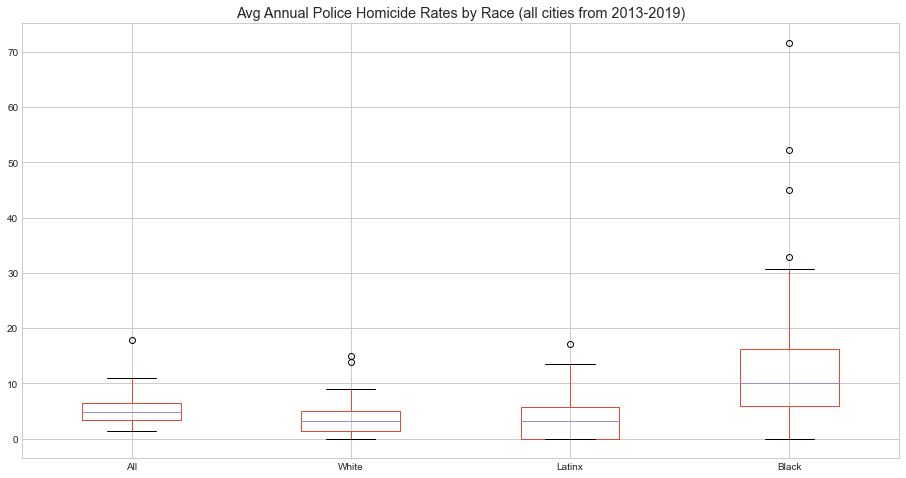

In [578]:
# create a box plot of avg police homicide rates by race

hom_rate_cols = ['Avg Annual Police Homicide Rate', 'Avg Annual Police Homicide Rate for White People', 'Avg Annual Police Homicide Rate for Hispanic People', 'Avg Annual Police Homicide Rate for Black People']
labels = ['All', 'White', 'Latinx', 'Black']
ax = mpv_li_df[hom_rate_cols].plot(figsize=(14,8), kind='box')
ax.set_xticklabels(labels)
ax.set_title("Avg Annual Police Homicide Rates by Race (all cities from 2013-2019)")

In [ ]:
TO DOs

1) Clean up notebook and add markdown cells [do this last]
2) Finish box plot of homicide rates
3) Finish function to mass make plots of other metrics
4) Pearson correlation addition
5) Drop unnecessary columns when I'm done making plots
6) Make things pretty! Colors! Ask Chad and Anne
7) Do the population size-correlated scatter plot sizes (also for segregation/integration metrics)
8) Make scripts [do this last] using a new branch
9) Do hypothesis testing
10) Finish bar graph of race of those killed
11) Create a bar graph based avg rate by race by city
12) Prep Type I/Type II error lesson